# check performance of the CNN model

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[207   0   0   2]
 [  0 212   0   1]
 [  1   1 192   0]
 [  8   0   0 176]]


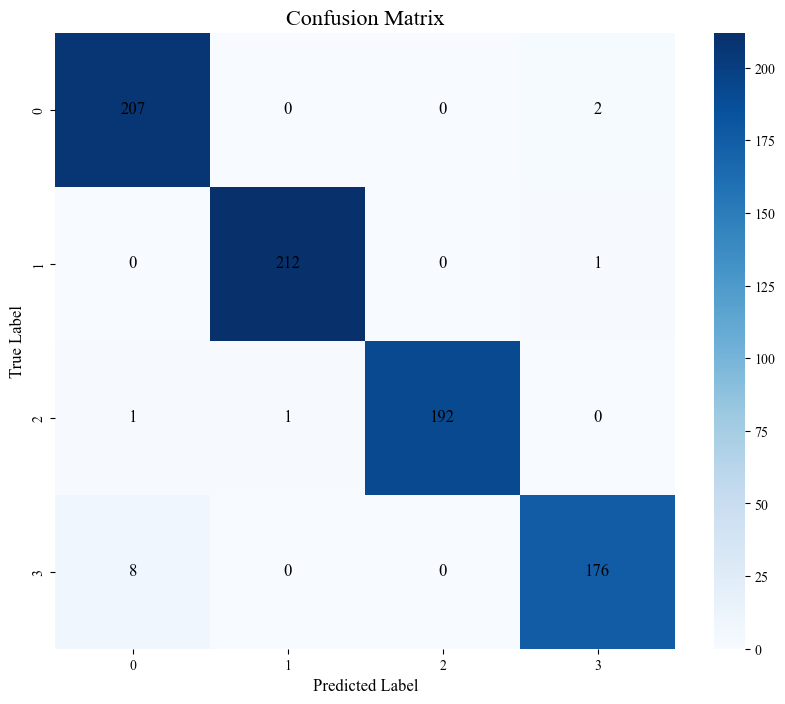

In [1]:
import numpy as np
import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained model using Keras 3 saving API
model = keras.saving.load_model('cnn_model.keras')

# Load the test data and ground truth labels
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

# Predict the classes for the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predicted probabilities to class indices

# If y_test is one-hot encoded, convert it to class indices
if y_test.ndim == 2:  # Check if y_test is one-hot encoded
    y_true = np.argmax(y_test, axis=1)  # Convert one-hot to class indices
else:
    y_true = y_test  # If not one-hot, use the original labels

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Set the font properties for Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# Increase figure size for better visibility
plt.figure(figsize=(10, 8))

# Plot the heatmap WITHOUT annotations
sns.heatmap(cm, annot=False, cmap='Blues')

# Manually add text annotations
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j + 0.5, i + 0.5,  # Position in the center of each cell
                 f'{cm[i, j]}',     # Text (value of the confusion matrix cell)
                 ha='center', va='center',   # Horizontal and vertical alignment
                 color='black',     # Text color
                 fontsize=12,       # Font size
                 fontfamily='Times New Roman')  # Font family

# Add title and labels with Times New Roman font
plt.title('Confusion Matrix', fontdict={'fontname': 'Times New Roman', 'fontsize': 16})
plt.xlabel('Predicted Label', fontdict={'fontname': 'Times New Roman', 'fontsize': 12})
plt.ylabel('True Label', fontdict={'fontname': 'Times New Roman', 'fontsize': 12})

# Save the plot as a PNG file
plt.savefig('cnn_confusion.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [2]:
from PIL import Image

# 打开 PNG 文件
png_image = Image.open("cnn_confusion.png")

# 将图像转换为 RGB 模式（JPG 格式不支持透明通道）
rgb_image = png_image.convert("RGB")

# 保存为 JPG 格式
rgb_image.save("cnn_confusion.jpg", quality=95)
